In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join as pjoin
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from scipy.stats import linregress
from sklearn.model_selection import KFold

import matplotlib
font = {"size": 20}
matplotlib.rc("font", **font)
matplotlib.rcParams["text.usetex"] = True

import sys

sys.path.append("../../models")
from linear_cr_new import LinearContrastiveRegression

In [2]:
data_dir = "./data/"
natural_images = np.load(pjoin(data_dir, "natural_images.npy"))
SUPERPOSITION_FRACTION_DIGIT = 0.25


In [3]:
np.random.seed(0)  # for reproducibility
rand_indices = np.random.permutation(
    natural_images.shape[0]
)  # just shuffles the indices
split = int(len(rand_indices) / 2)
target_indices = rand_indices[
    0:split
]  # choose the first half of images to be superimposed on target
background_indices = rand_indices[
    split:
]  # choose the second half of images to be background dataset

target = np.zeros((split, natural_images.shape[1]))
background = np.zeros((split, natural_images.shape[1]))
target_labels = np.zeros((split,1))


In [4]:
print("Corrupting images...")
for i in range(target.shape[0]):
    # Foreground
    np.random.seed(i + 123)  # for reproducibility
    height = np.random.randint(26)  # randomly pick a height
    target_labels[i] = height
    fidx = np.random.choice(target_indices)  # randomly pick a image

    # centered around (14, 14)
    reshaped_grass = np.reshape(natural_images[fidx, :], [28, 28])
    y1, y2, x1, x2 = 12, 16, 14 - int(height/2), 14 + height - int(height/2)
    base_grass = reshaped_grass
    base_grass[x1:x2, y1:y2] = base_grass[x1:x2, y1:y2] + (1-SUPERPOSITION_FRACTION_DIGIT) * np.ones(base_grass[x1:x2, y1:y2].shape) # force to be a fixed number
    target[i] = np.clip(np.reshape(base_grass, [1, 784]), a_min=0, a_max=1)
    
    # Background
    # (Just grass)
    np.random.seed(i)  # for reproducibility
    idx = np.random.choice(background_indices)  # randomly pick a image
    reshaped_grass = np.reshape(natural_images[idx, :], [28, 28])
    background[i] = np.reshape(reshaped_grass, [1, 784])


np.save("./data/foreground.npy", target)
np.save("./data/background.npy", background)
np.save("./data/foreground_labels.npy", target_labels)


Corrupting images...


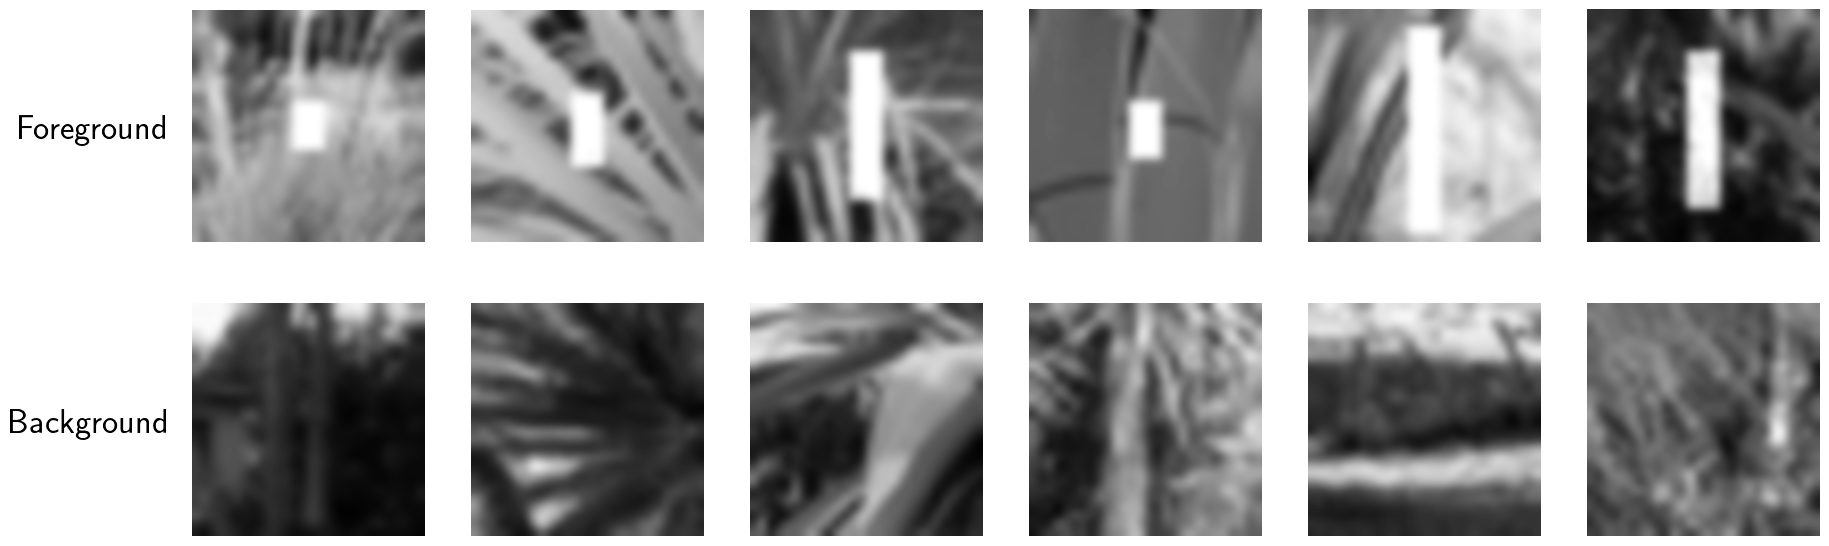

In [5]:
n_show = 6

plt.figure(figsize=[21, 7])

# Plot images from the target array (first row)
for i in range(n_show):
    plt.subplot(2, n_show, i + 1)
    plt.imshow(
        np.reshape(target[i + 3 , :], [28, 28]), cmap="gray", interpolation="bicubic"
    )
    plt.axis("off")
    if i == 0:
        plt.text(
            -3, 14, 'Foreground',
            fontsize=25, fontweight='bold', va='center', ha='right', color='black'
        )

# Plot images from the background array (second row)
for i in range(n_show):
    plt.subplot(2, n_show, n_show + i + 1)
    plt.imshow(
        np.reshape(background[i, :], [28, 28]), cmap="gray", interpolation="bicubic"
    )
    plt.axis("off")

    if i == 0:
        plt.text(
            -3, 14, 'Background',
            fontsize=25, fontweight='bold', va='center', ha='right', color='black'
        )


plt.savefig("./out/corrupted_line_example.png", dpi = 300)
plt.show()